<a href="https://colab.research.google.com/github/aaryarao/HousingPriceRegression/blob/main/Kaggle_ML_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Intro & Outline
1. Download the data
2. Explore and analyze variables
3. Prepare the data for ML training
4. Train baseline models
5. Make predictions
6. Perform feature engineering
9. Train with the entire dataset

### Importing the data

Install libraries, download kaggle data, view dataset files, load train & test sets




In [ ]:
# installing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mounting drive and importing data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Data/train.csv')

### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

*   supervised linear regression model
*   data columns: 

In [ ]:
# statistical description of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
# count of unique vals in each categorical column

def count_categorical(df):
    cat = df.select_dtypes(include=['object']).columns
    value_counts = {}
    for col in cat:
        value_counts[col] = df[col].value_counts()
    return value_counts

value_counts = count_categorical(df)
print(value_counts)

{'MSZoning': RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64, 'Street': Pave    1454
Grvl       6
Name: Street, dtype: int64, 'Alley': Grvl    50
Pave    41
Name: Alley, dtype: int64, 'LotShape': Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64, 'LandContour': Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64, 'Utilities': AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64, 'LotConfig': Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64, 'LandSlope': Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64, 'Neighborhood': NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU    

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

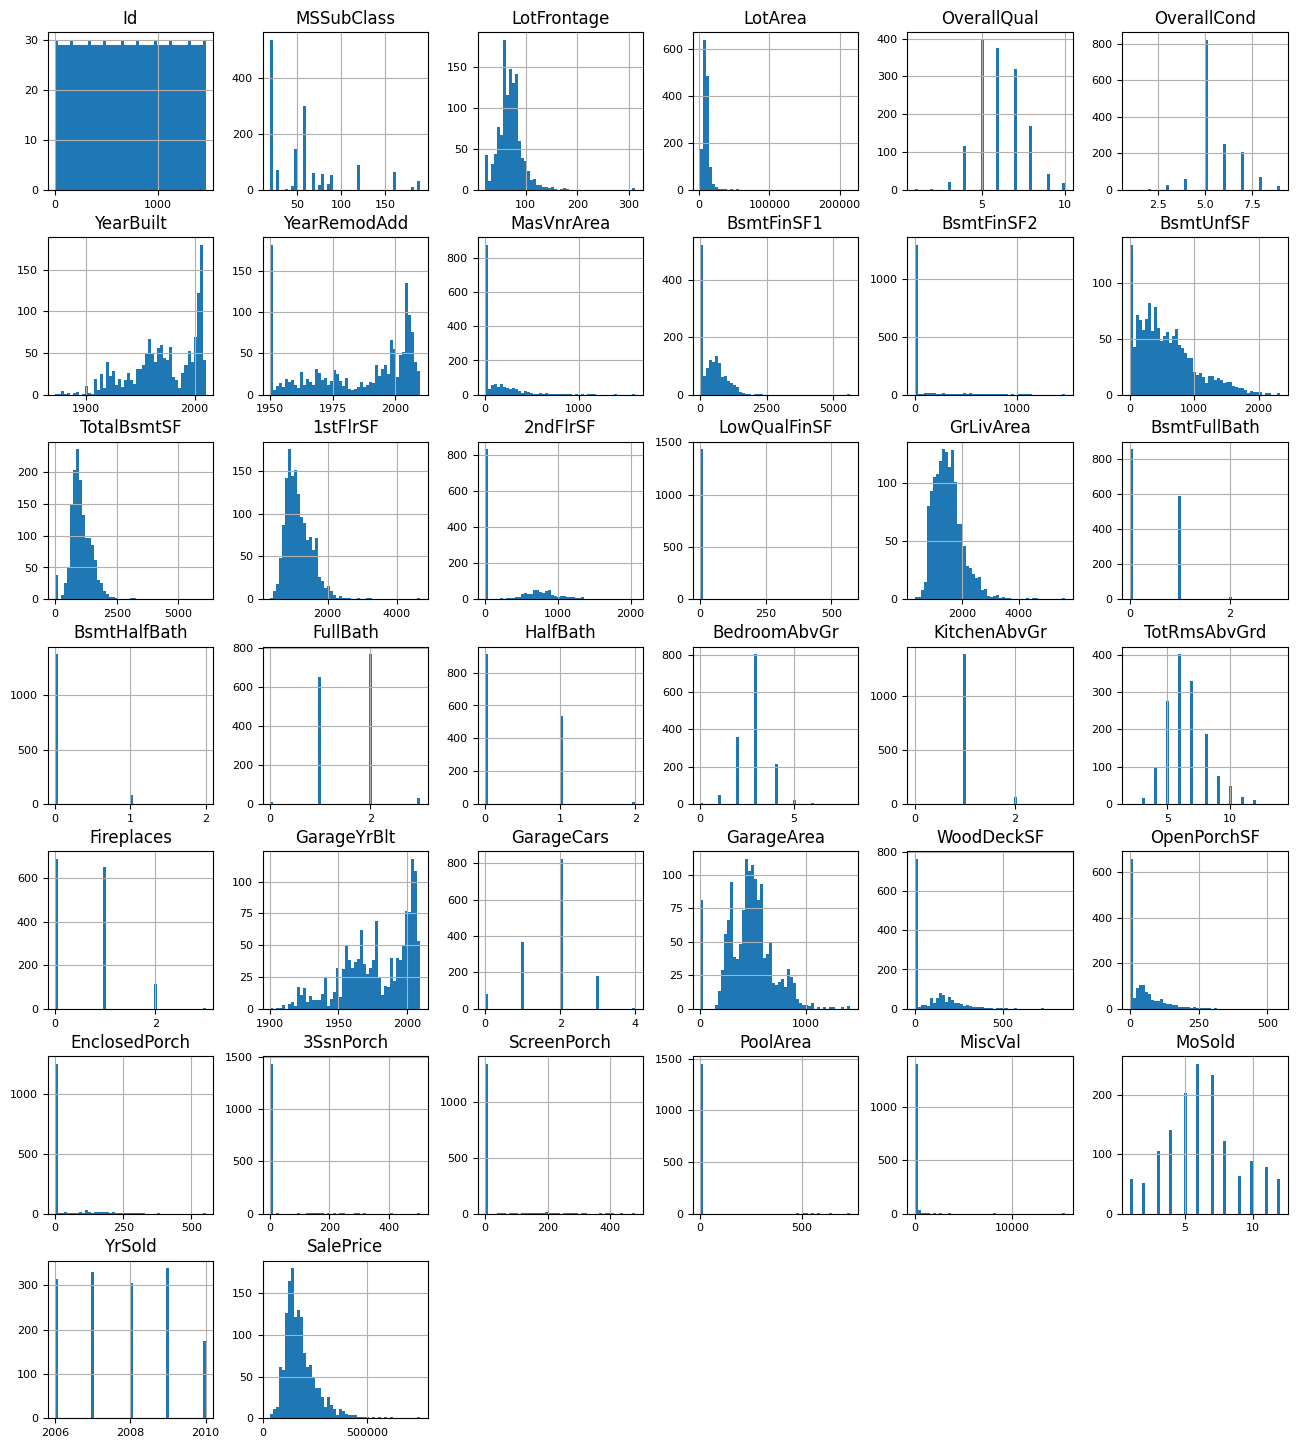

In [ ]:
# analyzing distribution of numerical dtypes
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 18), bins=50, xlabelsize=8, ylabelsize=8)

<ipython-input-9-ba57b0607140>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="RdBu")


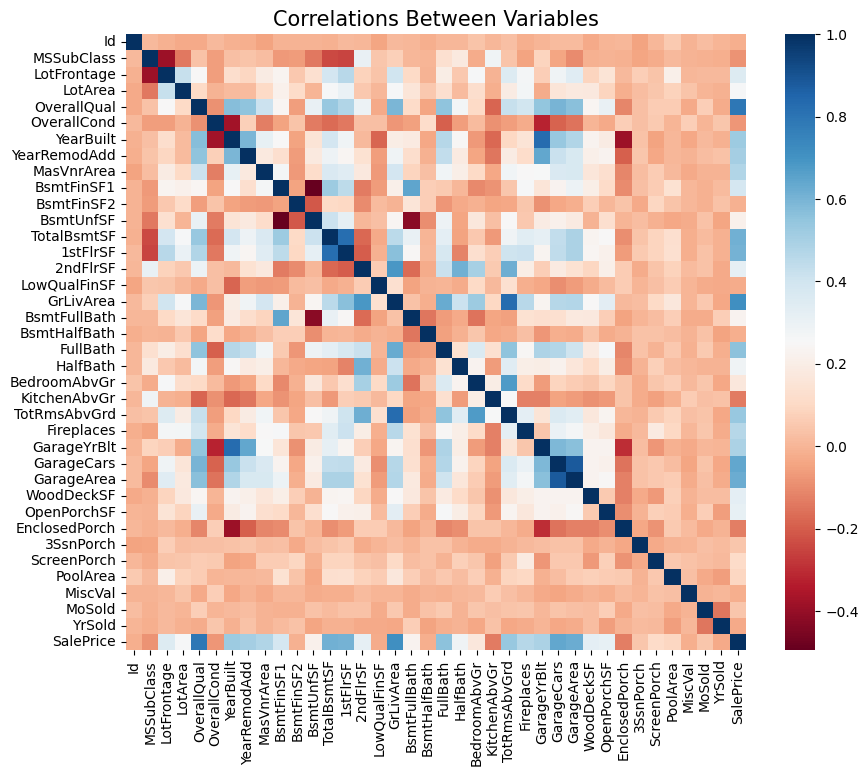

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [ ]:
# extract correlations with sale price col
corr_matrix = df.corr()
sale_price_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

print(sale_price_corr)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<ipython-input-10-5e7fe6e7800e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


overall correlation seems to be highly correlated with overall quality and greater living area

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


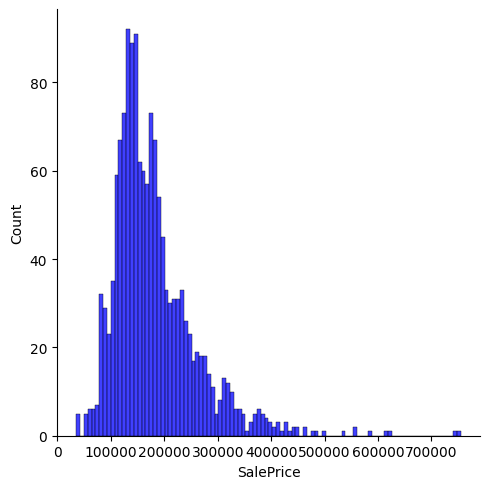

In [ ]:
# Understanding target variable
print(df['SalePrice'].describe())
sns.displot(df['SalePrice'], color='b', bins=100);

### Preparing data

In [ ]:
# feature engineering - creating new num cols
df['TotalSF']=df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF']
df['TotalRms']=df['FullBath']+df['HalfBath']+df['BsmtHalfBath']+df['BsmtFullBath']+df['TotRmsAbvGrd']

In [ ]:
# numerical columns that have <-0.50 or >0.50 correlation with sale price
print(list(df.corr()['SalePrice'][(df.corr()['SalePrice']>0.50) | (df.corr()['SalePrice']<-0.50)].index))

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice', 'TotalSF', 'TotalRms']


<ipython-input-13-63ae86077024>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(list(df.corr()['SalePrice'][(df.corr()['SalePrice']>0.50) | (df.corr()['SalePrice']<-0.50)].index))


In [55]:
# feature selection
x= df[['YearBuilt','YearRemodAdd','GrLivArea','GarageCars','TotalSF','TotalRms']]
y= df['SalePrice']

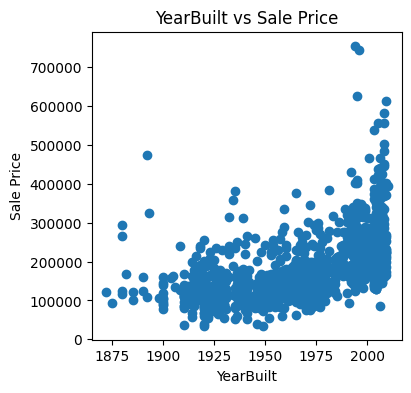

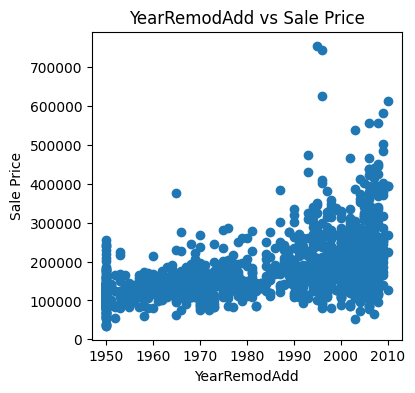

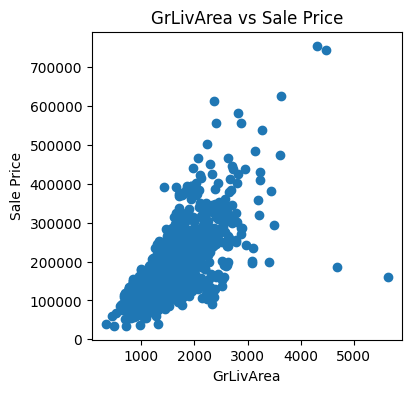

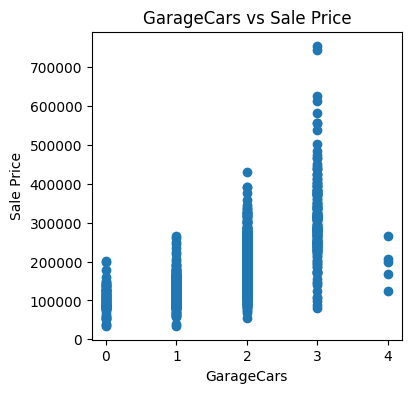

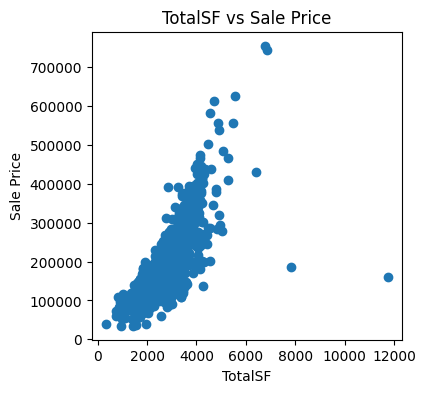

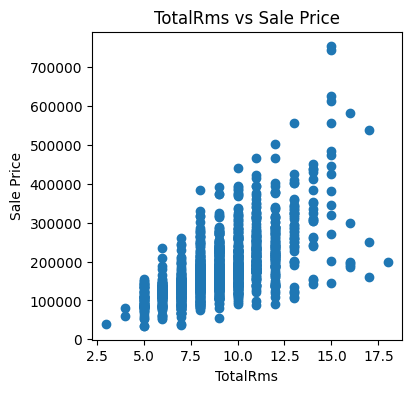

In [ ]:
# relationship pattern between selected features and target var

for feature_name in x.columns:
    # Create a scatter plot
    plt.figure(figsize=(4, 4))
    plt.scatter(x[feature_name], y)
    plt.xlabel(feature_name)
    plt.ylabel('Sale Price')
    plt.title(f"{feature_name} vs Sale Price")
    plt.show()

In [56]:
# importing train_test_split
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
# object of LinearRegression class
MLR = LinearRegression()
# fitting the training data
MLR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_train =  MLR.predict(x_test)
y_pred_train

array([142618.35144038, 287885.21186937, 112590.95649863, 163769.92984953,
       259240.99568859,  63803.39423783, 202952.23796676, 174746.70295742,
        61903.1359327 , 127609.26868131, 119109.36761501, 105984.70609753,
       124886.43812346, 226916.38025846, 212521.40551384, 134465.47169282,
       215135.84265282, 141845.94808286,  90067.07034912, 221484.64088593,
       210199.29572607, 207079.62822164, 198678.1372645 , 122994.75723114,
       212671.15020338, 181803.61531153, 210127.23583181, 106685.0894552 ,
       204986.0624148 , 209607.42381254, 121861.8977045 , 262995.16086197,
       245777.03028439, 100013.67715599, 261391.71245729, 129049.80930489,
       185333.16727373, 229020.99297988, 296902.09500146,  61370.63713299,
       105993.63052466, 240271.30975194, 115339.59352276, 303889.9710285 ,
       130819.11300587, 150517.2335904 , 104982.27221265, 113614.74157923,
       311237.40253583, 139334.73840641,  96322.29771511, 203764.32741212,
       117103.65008074, 2

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting accuracy
score=r2_score(y_test,y_pred_train)

print('r2 score:',score)
print('mean_squared_error:',mean_squared_error(y_test,y_pred_train))
print('root_mean_squared error:',np.sqrt(mean_squared_error(y_test,y_pred_train)))

r2 score: 0.7652991557323543
mean_squared_error: 1800232036.6350667
root_mean_squared error: 42429.14136103943


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Data/test.csv')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
df_test['TotalSF']=df_test['TotalBsmtSF']+df_test['1stFlrSF']+df_test['2ndFlrSF']
df_test['TotalRms']=df_test['FullBath']+df_test['HalfBath']+df_test['BsmtHalfBath']+df_test['BsmtFullBath']+df_test['TotRmsAbvGrd']

In [ ]:
x_test = df_test[['YearBuilt','YearRemodAdd','GrLivArea','GarageCars','TotalSF','TotalRms']]

In [ ]:
from sklearn.impute import SimpleImputer

# instance of SimpleImputer using median
imputer = SimpleImputer(strategy='median')

# fit on the selected features
imputer.fit(x_test[['GarageCars', 'TotalSF', 'TotalRms']])

# imputing the missing values
x_test[['GarageCars', 'TotalSF', 'TotalRms']] = imputer.transform(x_test[['GarageCars', 'TotalSF', 'TotalRms']])

<ipython-input-46-1911b61c9f54>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[['GarageCars', 'TotalSF', 'TotalRms']] = imputer.transform(x_test[['GarageCars', 'TotalSF', 'TotalRms']])


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearBuilt     1459 non-null   int64  
 1   YearRemodAdd  1459 non-null   int64  
 2   GrLivArea     1459 non-null   int64  
 3   GarageCars    1459 non-null   float64
 4   TotalSF       1459 non-null   float64
 5   TotalRms      1459 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 68.5 KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [ ]:
y_pred_test = MLR.predict(x_train)
print(y_pred_test)

[138810.4147451  194576.05500137  42243.50801555 ... 131536.02726581
 138990.55804681 245807.05961686]


In [ ]:
prediction = pd.DataFrame(y_pred_test, columns=['SalePrice'])
submission = pd.concat([df_test['Id'], prediction], axis=1)
submission.set_index('Id')
submission.to_csv('Submission_May-29.csv')

In [58]:
from google.colab import auth
auth.authenticate_user()